# Homework 01
Austin Derrow-Pinion

### Problem 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/height_weight.csv')
x_ = df.height
y_ = df.weight
x_std = x_.std()
y_std = y_.std()
df.head()

,height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [3]:
# normalize the data
df_norm = (df - df.mean()) / df.std()
x_norm = df_norm.height
y_norm = df_norm.weight

In [6]:
# define functions
def f(x, w, b):
    return w * x + b

def MSE(u, v):
    return ((u - v) ** 2).mean()

def gradient(x, y, w, b):
    return np.array([(f(x, w, b) - y).mean(), ((f(x, w, b) - y) * x).mean()])

def fix_w_and_b(w_norm, b_norm):
    return np.array([w_norm * (y_std / x_std), y_std * (((0 - x_.mean() * w_norm) / x_std) + b_norm + y_.mean() / y_std)])

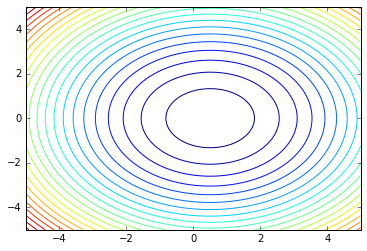

In [5]:
# draw countour lines
a = np.linspace(-5, 5, 100) # get 100 equally spaced values between 5 and 10
b = np.linspace(-5, 5, 100)

(aa, bb) = np.meshgrid(a, b) # make each a square matrix

mse = np.zeros((100, 100)) # init mse to same size as aa and bb matrices

for i in range(100):
    for j in range(100):
        mse[i, j] = MSE(f(x_norm, aa[i, j], bb[i, j]), y_norm)
plt.contour(aa, bb, mse, 25)

In [13]:
w_norm = np.random.randint(10)
b_norm = np.random.randint(10)
alpha = 0.1

w = w_norm
b = b_norm

lastError = 0
error = float('inf')

iterations = 0

while(np.abs(error - lastError) > 0.001):
    iterations += 1
    gradients = gradient(x_norm, y_norm, w_norm, b_norm)
    b_norm -= alpha * gradients[0]
    w_norm -= alpha * gradients[1]
    
    fixes = fix_w_and_b(w_norm, b_norm)
    w = fixes[0]
    b = fixes[1]
    
    lastError = error
    error = MSE(f(x_, w, b), y_)
    print("iteration %d, w = %0.3f, b = %0.3f, mse = %0.3f" % (iterations, w, b, error))

iteration 1, w = 16.865, b = -956.624, mse = 4753.451
iteration 2, w = 15.486, b = -869.223, mse = 3869.602
iteration 3, w = 14.246, b = -790.561, mse = 3153.683
iteration 4, w = 13.130, b = -719.766, mse = 2573.789
iteration 5, w = 12.125, b = -656.049, mse = 2104.073
iteration 6, w = 11.221, b = -598.705, mse = 1723.603
iteration 7, w = 10.407, b = -547.094, mse = 1415.422
iteration 8, w = 9.675, b = -500.644, mse = 1165.795
iteration 9, w = 9.016, b = -458.839, mse = 963.597
iteration 10, w = 8.423, b = -421.214, mse = 799.816
iteration 11, w = 7.889, b = -387.352, mse = 667.154
iteration 12, w = 7.408, b = -356.876, mse = 559.697
iteration 13, w = 6.976, b = -329.447, mse = 472.657
iteration 14, w = 6.587, b = -304.761, mse = 402.154
iteration 15, w = 6.236, b = -282.543, mse = 345.047
iteration 16, w = 5.921, b = -262.547, mse = 298.790
iteration 17, w = 5.637, b = -244.551, mse = 261.322
iteration 18, w = 5.382, b = -228.354, mse = 230.973
iteration 19, w = 5.152, b = -213.777, m

With a learning rate of 0.1 and a requirement that the difference between the last MSE and the current MSE must be greater than 0.001, gradient descent stopped after 67 iterations.

w = 3.097, b = -83.411, mse = 101.593

### Problem 2

To show that the number b that is the closest to a set of n numbers in terms of mean square error is the average of the numbers, set the derivative of the mean square error equal to zero.

MSE = g(y) = (1 / m) * [ sum from i = 0 to m of (y_i - b)^2 ]

Taking the derivative of this function:

(d/dy) g(y) = (d/dy) (1 / m) * [ sum from i = 0 to m of (y_i - b)^2 ]
    
    = (1 / m) (d/dy) [ sum from i = 0 to m of (y_i - b)^2 ]
    = (2 / m) [sum from i = 0 to m of (y_i - b) ]
    
Now when we set this equal to 0, the constants on the outside dissappear leaving us with:

    [sum from i = 0 to m of (y_i - b) ] = 0
    (y_0 - b) + (y_1 - b) + ... + (y_m - b) = 0
    
Where y_i = b.

### Problem 3

Three distinct pieces of advice to launch your career in deep learning research:

1. Take as many physics and math courses as possible, while also learning how to code.
  
2. Find an interesting AI-related problem and analyze it yourself. Read literature on it, get help from a professor, and try to either publish a paper about your research or release open source code. 

3. Apply for a PhD program with a professor who works on topics of interest to you, but if you aren't accepted right away try to get a job at Facebook or Google as an engineering assistant for research scientists at FAIR or Google Brain to then get suggested for a PhD program in the future.